In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm  #Color maps
from mpl_toolkits.mplot3d import Axes3D #Need this for a '3d' projection

from scipy import linalg

from scipy import special
special.errprint(1)

%matplotlib inline


In [2]:
# %matplotlib qt
%matplotlib inline

### Linear

cost function:
$$
f(x)=\frac{1}{2}x^TAx-b^Tx+c\\
x=[x_1,x_2]^T
$$

In [3]:
def fx(xx,A,b,c):
    xx=xx.reshape(-1,1)
    b=b.reshape(-1,1)
    return 1/2*np.dot(np.dot(xx.T,A),xx)-np.dot(b.T,xx)+c

In [4]:
x1=np.arange(-4,6,0.1)#.reshape(-1,1)
x2=np.arange(-6,4,0.1)#.reshape(-1,1)


A=np.array([[3,2],[2,6]])
b=np.array([2,-8])
c=0

Z=np.zeros([len(x2),len(x1)])

for j in range(len(x2)):
    for i in range(len(x1)):
        Z[j,i]=fx(np.array([x1[i],x2[j]]),A,b,c)
        



(-4.0, 6.0, -6.0, 4.0)

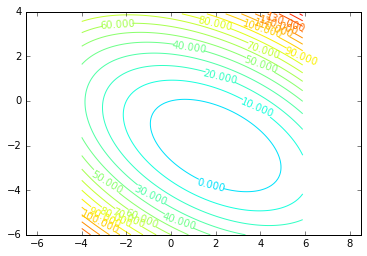

In [5]:
X1,X2=np.meshgrid(x1,x2)
plt.figure()
level=np.arange(-100,200,10)
CS = plt.contour(X1, X2, Z,levels=level)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')

In [6]:
fx(np.array([2,-2]),A,b,c)

array([[-10.]])

### Nonlinear

Nonlinear cost function:  
$$
f(x_1,x_2)=3(1-x_1)^2 e^{-x_1^2-(x_2+1)^2}-
10(\frac{x_1}{5}-x_1^3-x_2^5) e^{-x_1^2-x_2^2}
-\frac{1}{3}e^{-(x_1+1)^2-x_2^2}
$$

In [7]:
x1=np.arange(-3,3,0.1)
x2=np.arange(-3,3,.1)
X1,X2=np.meshgrid(x1,x2)
Y=3*(1-X1)**2*np.exp(-X1**2-(X2+1)**2)\
-10*(X1/5-X1**3-X2**5)*np.exp(-X1**2-X2**2)\
-1/3*np.exp(-(X1+1)**2-X2**2)


# Y2=np.empty_like(Y)
# for i in range(len(x1)):
#     for j in range(len(x2)):
#         Y2[j,i]=1/27*(3*x1[i]**4-28*x1[i]**3+84*x1[i]**2-96*x1[i]+64)+x2[j]**2

C:\Users\JLi104\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


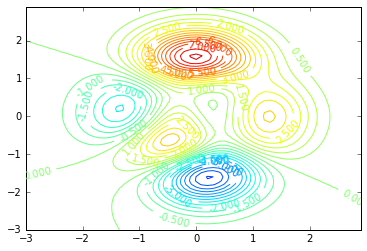

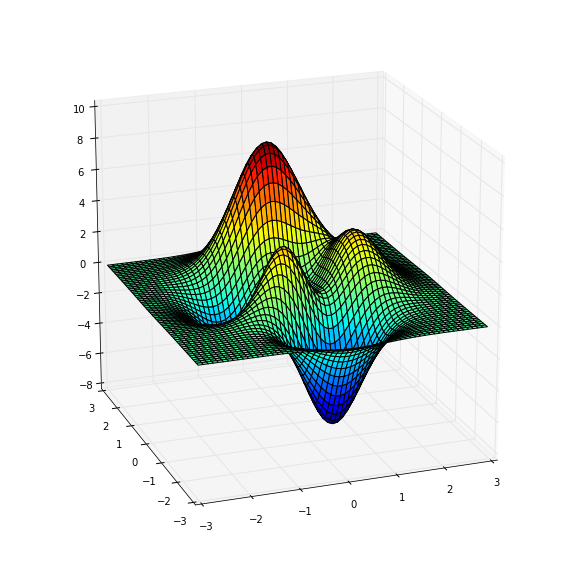

In [8]:
plt.figure()
# cax=plt.imshow(Y,extent=(-10,10,-10,10))
# plt.colorbar(cax)
level=np.arange(-10,10,0.5)
CS = plt.contour(X1, X2, Y,levels=level)
plt.clabel(CS, inline=1, fontsize=10)

fig = plt.figure(figsize=(10,10))
 #Create 3D axes in the figure.
ax = fig.gca(projection='3d')
 #Plot the surface.
surf = ax.plot_surface(X1,X2,Y, cmap=cm.jet, rstride=1, cstride=1)
 #Adjust the viewing angle.
ax.view_init(elev=20.0, azim=250.0)

# #plt.xlim(-5,5)
# plt.figure()
# # plt.imshow(Y2,extent=(-10,10,-10,10))
# level=np.arange(0,8,0.2)
# CS = plt.contour(X1, X2, Y,levels=level)
# plt.clabel(CS, inline=1, fontsize=10)

In [9]:
2/(1+(2+1.414)/(2-1.414))

0.29300000000000004

# simple inversion
$$
y=a e^{bx} \\
gradient = [e^{bx}, axe^{bx} ]
$$

In [10]:
def func3(x,a,b):
    return a*np.exp(b*x)

def func4ana(x,a,b,order=0):
    if order ==0:
        return np.exp(b*x)
    elif order ==1:
        return a*x*np.exp(b*x)
    else:
        return np.nan

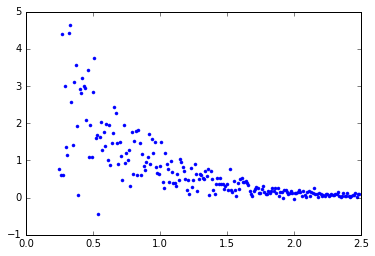

In [11]:
x=np.arange(0.25,2.5,0.01)

Nx=len(x)
Nm=2

a=5
b=-1.8
yobs=func3(x,a,b)*(1+0.5*np.random.randn(len(x)))
plt.plot(x,yobs,'.')


[ 4.06764201 -1.56017567]


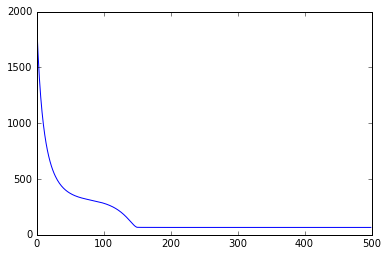

In [12]:
ag=-5
bg=-1
N=500
res=np.zeros(N)


mest=np.zeros([N+1,Nm])
mest[0,:]=np.array([ag,bg])
alpha=0.1

c1=0.001
Ek=(yobs-func3(x,ag,bg)).dot(yobs-func3(x,ag,bg))


for i in range(N):
    yres=(yobs-func3(x,ag,bg))
    res[i]=yres.dot(yres)
    ydev=np.zeros([Nx,Nm])
    ydev[:,0]=func4ana(x,ag,bg,0)
    ydev[:,1]=func4ana(x,ag,bg,1)

    b=-yres.dot(ydev)

## Newton method:
#     B=ydev.T.dot(ydev)
#     mest[i+1,:]=np.array([ag,bg])-np.linalg.solve(B,b)


# Gradient method:
    babs=np.sqrt(b.dot(b))
    mest[i+1,:]=np.array([ag,bg])-alpha*b/babs  ## This is gradient method
    ag,bg=mest[i+1,:]
    Ek1=(yobs-func3(x,ag,bg)).dot(yobs-func3(x,ag,bg))
    if Ek1 > Ek+c1*alpha*b.dot(b)/babs: 
        alpha=alpha/2
    Ek=Ek1

### simple Gradient method:
#     mest[i+1,:]=np.array([ag,bg])-alpha*b  ## This is gradient method
#     ag,bg=mest[i+1,:]
#     alpha=alpha/1.2
    
#     print(mest)

plt.plot(res)
print(mest[-1,:])

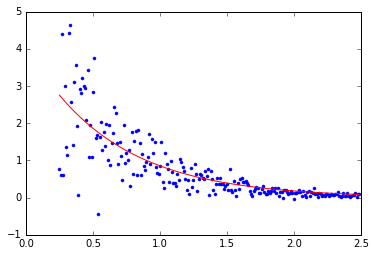

In [13]:
plt.figure(1)
plt.plot(x,yobs,'.')
plt.plot(x,func3(x,ag,bg),'r')

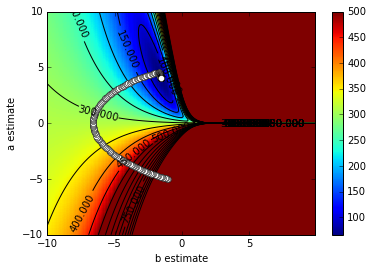

In [14]:
a=np.arange(-10,10,0.1)
b=np.arange(-10,10,0.1)

Na=len(a)
Nb=len(b)

Res=np.zeros([Na,Nb])

ymin=-10
ymax=10
for i in range(Na):
    for j in range(Nb):
        Res[i,j]=(yobs-func3(x,a[i],b[j])).dot(yobs-func3(x,a[i],b[j]))
        
cx=plt.imshow(Res,interpolation='nearest',vmax=500,origin='lower',extent=[b[0],b[-1],a[0],a[-1]]
             ,aspect='auto')

X, Y = np.meshgrid(b, a)
CS = plt.contour(X, Y, Res,range(0,1000,50),colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.plot(mest[:,1],mest[:,0],'wo-')
plt.colorbar(cx)
plt.xlim(b[0],b[-1])
plt.ylim(ymin,ymax)
plt.xlabel('b estimate')
plt.ylabel('a estimate')

[[Variables]]
    a:   1.51266825 +/- 0.021480 (1.42%) (init= 0.0001)
    b:  -1.78397910 +/- 0.023932 (1.34%) (init= 2)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      = -0.884 


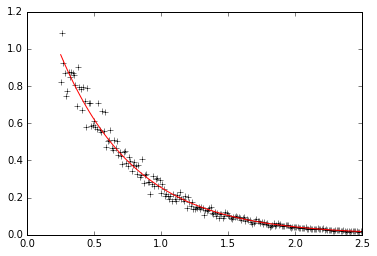

In [15]:
from lmfit import minimize, Parameters, Parameter, report_fit
import numpy as np

# create data to be fitted
x =np.arange(0.25,2.5,0.01)

ar=1.5
br=-1.8
data = ar*np.exp(x*br)*(1+0.1*np.random.randn(len(x)))
        

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    a = params['a'].value
    b = params['b'].value

    model = a*np.exp(x*b)
    return model - data

# create a set of Parameters
params = Parameters()
params.add('a',   value= 0.0001)
params.add('b', value= 2)



# do fit, here with leastsq model
result = minimize(fcn2min, params, args=(x, data))

# calculate final result
final = data + result.residual

# write error report
report_fit(result.params)

# try to plot results
try:
    import pylab
    pylab.plot(x, data, 'k+')
    pylab.plot(x, final, 'r')
    pylab.show()
except:
    pass

# plt.plot(result.residual)

test 2
$$
y=sin(\omega mg_1 x)+mg_1\times mg_2\\
grad=[\omega x cos(\omega mg_1 x)+mg_2, mg_1 ]
$$

In [16]:
def func1(x,a,b):
    return np.sin(x*a)+a*b

def func2ana(x,a,b,order=0):
    if order ==0:
        return x*np.cos(a*x)+b
    elif order ==1:
        return a*np.ones(len(x))
    else:
        return np.nan

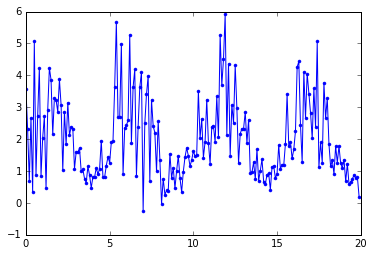

In [17]:
x=np.arange(0,20,.1)

Nx=len(x)
Nm=2

a=1.2
b=1.5
yobs=func1(x,a,b)*(1+0.5*np.random.randn(len(x)))
plt.plot(x,yobs,'.-')

[ 1.20956654  1.63246589]


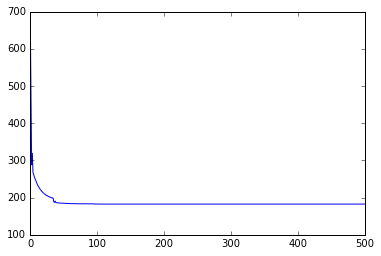

In [18]:
ag=1
bg=1
N=500
res=np.zeros(N)

mest=np.zeros([N+1,Nm])
mest[0,:]=np.array([ag,bg])
alpha=0.1

c1=0.001
Ek=(yobs-func1(x,ag,bg)).dot(yobs-func1(x,ag,bg))


for i in range(N):
    yres=(yobs-func1(x,ag,bg))
    res[i]=yres.dot(yres)
    ydev=np.zeros([Nx,Nm])
    ydev[:,0]=func2ana(x,ag,bg,0)
    ydev[:,1]=func2ana(x,ag,bg,1)

    b=-yres.dot(ydev)

## Newton method:
#     B=ydev.T.dot(ydev)
#     mest[i+1,:]=np.array([ag,bg])-np.linalg.solve(B,b)


# Gradient method:
    babs=np.sqrt(b.dot(b))
    mest[i+1,:]=np.array([ag,bg])-alpha*b/babs  ## This is gradient method
    ag,bg=mest[i+1,:]
    Ek1=(yobs-func1(x,ag,bg)).dot(yobs-func1(x,ag,bg))
    if Ek1 > Ek+c1*alpha*b.dot(b)/babs: 
        alpha=alpha/2
    Ek=Ek1

### simple Gradient method:
#     mest[i+1,:]=np.array([ag,bg])-alpha*b  ## This is gradient method
#     ag,bg=mest[i+1,:]
#     alpha=alpha/1.2
    
#     print(mest)

plt.plot(res)
print(mest[-1,:])

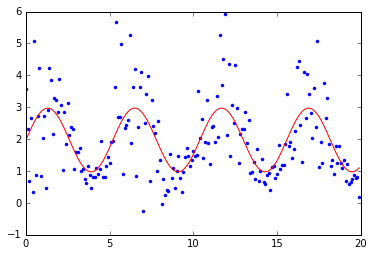

In [19]:
plt.figure(1)
plt.plot(x,yobs,'.')
plt.plot(x,func1(x,ag,bg),'r')

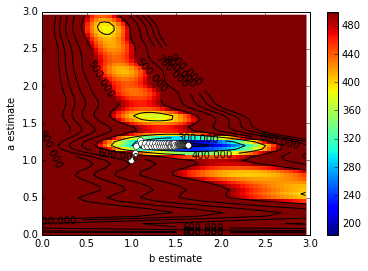

In [20]:
a=np.arange(-1,3,0.05)
b=np.arange(-1,3,0.05)

Na=len(a)
Nb=len(b)

Res=np.zeros([Na,Nb])

ymin=0
ymax=3
xmin=0
xmax=3

for i in range(Na):
    for j in range(Nb):
        Res[i,j]=(yobs-func1(x,a[i],b[j])).dot(yobs-func1(x,a[i],b[j]))
        
cx=plt.imshow(Res,interpolation='nearest',vmax=500,origin='lower',extent=[b[0],b[-1],a[0],a[-1]]
             ,aspect='auto')

X, Y = np.meshgrid(b, a)
CS = plt.contour(X, Y, Res,range(0,1000,100),colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.plot(mest[:,1],mest[:,0],'wo-')
plt.colorbar(cx)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('b estimate')
plt.ylabel('a estimate')

# Simulated anealing, for sine func

[ 0.52317927  3.45446011]


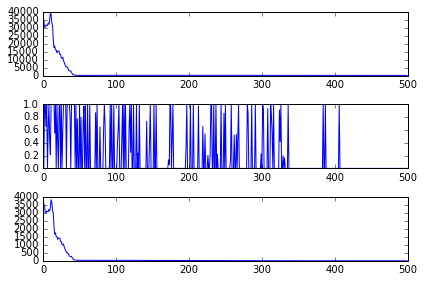

In [21]:
ag=4
bg=4
N=500
res=np.zeros(N)
dm=0.2

mest=np.zeros([N+1,Nm])
mest[0,:]=np.array([ag,bg])
# alpha=0.1
phis=np.zeros(N+1)
phis[0]=1

T=np.zeros(N)

# c1=0.001
Eg=(yobs-func1(x,ag,bg)).dot(yobs-func1(x,ag,bg))
Eg0=Eg


for i in range(N):
    T[i]=0.1 * Eg * ((N-i)/N)**2
    
    agn=np.random.randn()*dm+ag
    bgn=np.random.randn()*dm+bg
    
    yres=(yobs-func1(x,agn,bgn))
    Ea=yres.dot(yres)
    
    if Ea < Eg:
        ag=agn
        bg=bgn
        Eg=Ea
        phis[i]=1
    else:
        p1=np.exp(-(Ea-Eg)/T[i])
        p2=np.random.rand()
        if  p1>p2 :
            ag=agn
            bg=bgn
            Eg=Ea
            phis[i]=p1
    res[i]=Eg
    mest[i+1,:]=np.array([ag,bg])


plt.figure(1)
plt.subplot(311)
plt.plot(res)
print(mest[-1,:])

plt.subplot(312)
plt.plot(phis)

plt.subplot(313)
plt.plot(T)

plt.tight_layout()

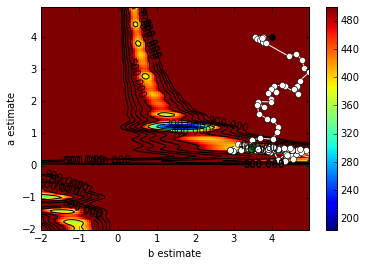

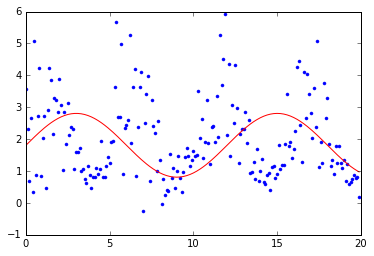

In [22]:
a=np.arange(-2,5,0.05)
b=np.arange(-2,5,0.05)

Na=len(a)
Nb=len(b)

Res=np.zeros([Na,Nb])

ymin=a[0]
ymax=a[-1]
xmin=b[0]
xmax=b[-1]

plt.figure(1)
for i in range(Na):
    for j in range(Nb):
        Res[i,j]=(yobs-func1(x,a[i],b[j])).dot(yobs-func1(x,a[i],b[j]))
        
cx=plt.imshow(Res,interpolation='nearest',vmax=500,origin='lower',extent=[b[0],b[-1],a[0],a[-1]]
             ,aspect='auto')

X, Y = np.meshgrid(b, a)
CS = plt.contour(X, Y, Res,range(0,1000,100),colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.plot(mest[0:2,1],mest[0:2,0],'ko-')
plt.plot(mest[1:-1,1],mest[1:-1,0],'wo-')
plt.plot(mest[-2:,1],mest[-2:,0],'go-')
plt.colorbar(cx)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('b estimate')
plt.ylabel('a estimate')

plt.figure(2)
plt.plot(x,yobs,'.')
plt.plot(x,func1(x,ag,bg),'r')

### Simulated Anealing

[ 0.50421668  3.24329114]


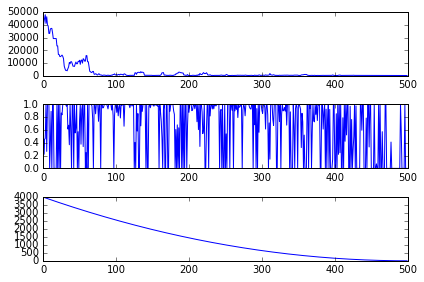

In [23]:
ag=4
bg=4
N=500
res=np.zeros(N)
dm=0.2

mest=np.zeros([N+1,Nm])
mest[0,:]=np.array([ag,bg])
# alpha=0.1
phis=np.zeros(N+1)
phis[0]=1

T=np.zeros(N)

# c1=0.001
Eg=(yobs-func1(x,ag,bg)).dot(yobs-func1(x,ag,bg))
Eg0=Eg


for i in range(N):
    T[i]=0.1 * Eg0 * ((N-i)/N)**2
    
    agn=np.random.randn()*dm+ag
    bgn=np.random.randn()*dm+bg
    
    yres=(yobs-func1(x,agn,bgn))
    Ea=yres.dot(yres)
    
    if Ea < Eg:
        ag=agn
        bg=bgn
        Eg=Ea
        phis[i]=1
    else:
        p1=np.exp(-(Ea-Eg)/T[i])
        p2=np.random.rand()
        if  p1>p2 :
            ag=agn
            bg=bgn
            Eg=Ea
            phis[i]=p1
    res[i]=Eg
    mest[i+1,:]=np.array([ag,bg])


plt.figure(1)
plt.subplot(311)
plt.plot(res)
print(mest[-1,:])

plt.subplot(312)
plt.plot(phis)

plt.subplot(313)
plt.plot(T)

plt.tight_layout()

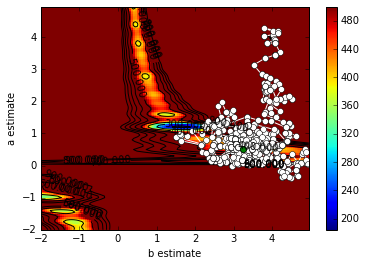

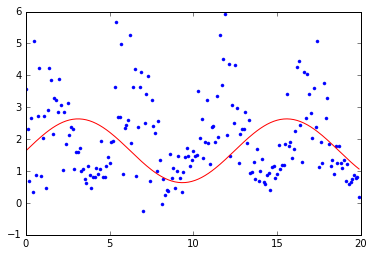

In [24]:
a=np.arange(-2,5,0.05)
b=np.arange(-2,5,0.05)

Na=len(a)
Nb=len(b)

Res=np.zeros([Na,Nb])

ymin=a[0]
ymax=a[-1]
xmin=b[0]
xmax=b[-1]

plt.figure(1)
for i in range(Na):
    for j in range(Nb):
        Res[i,j]=(yobs-func1(x,a[i],b[j])).dot(yobs-func1(x,a[i],b[j]))
        
cx=plt.imshow(Res,interpolation='nearest',vmax=500,origin='lower',extent=[b[0],b[-1],a[0],a[-1]]
             ,aspect='auto')

X, Y = np.meshgrid(b, a)
CS = plt.contour(X, Y, Res,range(0,1000,100),colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.plot(mest[0:2,1],mest[0:2,0],'ko-')
plt.plot(mest[1:-1,1],mest[1:-1,0],'wo-')
plt.plot(mest[-2:,1],mest[-2:,0],'go-')
plt.colorbar(cx)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('b estimate')
plt.ylabel('a estimate')

plt.figure(2)
plt.plot(x,yobs,'.')
plt.plot(x,func1(x,ag,bg),'r')

## package

[[Variables]]
    a:   1.49672091 +/- 0.001473 (0.10%) (init= 1.3)
    b:   1.00499854 +/- 0.007970 (0.79%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)


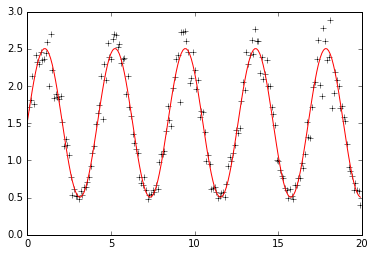

In [25]:
# create data to be fitted
x =np.arange(0,20,0.1)

ar=1.5
br=1
data = (np.sin(x*ar)+ar*br)*(1+0.1*np.random.randn(len(x)))
        

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    a = params['a'].value
    b = params['b'].value

    model = np.sin(x*a)+a*b
    return model - data

# create a set of Parameters
params = Parameters()
params.add('a',   value= 1.3)
params.add('b', value= 1)



# do fit, here with leastsq model
result = minimize(fcn2min, params, args=(x, data))

# calculate final result
final = data + result.residual

# write error report
report_fit(result.params)

# try to plot results
try:
    import pylab
    pylab.plot(x, data, 'k+')
    pylab.plot(x, final, 'r')
    pylab.show()
except:
    pass

## Example from lmfit package

[[Variables]]
    amp:     4.97338030 +/- 0.042352 (0.85%) (init= 10)
    decay:   0.02553452 +/- 0.000497 (1.95%) (init= 0.1)
    shift:  -0.08177255 +/- 0.010980 (13.43%) (init= 0)
    omega:   1.99655055 +/- 0.003539 (0.18%) (init= 3)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, omega)              = -0.786 
    C(amp, decay)                =  0.583 
    C(amp, shift)                = -0.121 


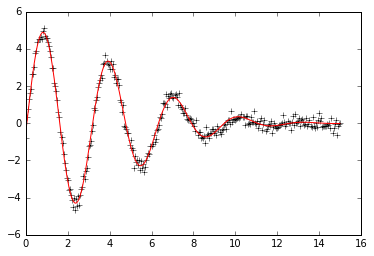

In [26]:
#<examples/doc_basic.py>
from lmfit import minimize, Parameters, Parameter, report_fit
import numpy as np

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5. * np.sin(2 * x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2) )

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    amp = params['amp'].value
    shift = params['shift'].value
    omega = params['omega'].value
    decay = params['decay'].value

    model = amp * np.sin(x * omega + shift) * np.exp(-x*x*decay)
    return model - data

# create a set of Parameters
params = Parameters()
params.add('amp',   value= 10,  min=0)
params.add('decay', value= 0.1)
params.add('shift', value= 0.0, min=-np.pi/2., max=np.pi/2)
params.add('omega', value= 3.0)


# do fit, here with leastsq model
result = minimize(fcn2min, params, args=(x, data))

# calculate final result
final = data + result.residual

# write error report
report_fit(result.params)

# try to plot results
try:
    import pylab
    pylab.plot(x, data, 'k+')
    pylab.plot(x, final, 'r')
    pylab.show()
except:
    pass